# Imports


In [ ]:
import re
import string
import pandas as pd
import seaborn as sns
import warnings
import time
import math
import random
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Laptop data/4-1/SoP/Lang_Detection/NewData/archive/Language Detection.csv')
df_train.head()

FileNotFoundError: ignored

In [ ]:
df_train.Language.value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
df_train.shape

(10337, 2)

# getting only latin derived

In [ ]:
latin_derived = {"English", "French", "Spanish", "Portugeese", "Italian", "Russian", "Sweedish", "Dutch", "Turkish", "German", "Danish"}

df_new = pd.DataFrame(columns = ["Text", "Language"])
df = df_train
for i in range(df.shape[0]):
    if(df.at[i, 'Language'] in latin_derived):
        df_new.loc[len(df_new.index)] = [df.at[i, 'Text'], df.at[i, 'Language']]

df_new.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


# Data Pre Processing


In [ ]:
df_new.Language.value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Dutch          546
Turkish        474
German         470
Danish         428
Name: Language, dtype: int64

In [ ]:
df_new.hist(column='Language')

ValueError: ignored

In [ ]:
def removeSymbolsAndNumbers(text):
        text = re.sub(r'[{}]'.format(string.punctuation), '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[@]', '', text)
        text = text.replace('"', '')
        text = text.replace('\\', '')
        text = text.replace('\u2009', '')
        text = text.replace('-', '')
        text = text.replace('–', '')
        text = text.replace('—', '')
        text = text.replace('“', '')
        text = text.replace('”', '')
        text = text.replace('•', '')
        text = text.replace('…', '')
        text = text.replace('\u202f', '')
        text = text.replace('№', '')
        text = text.replace('\u200b', '')
        text = text.replace('‑', '')
        text = text.replace('’', '')
        text = text.replace('€', '')
        text = text.replace('„', '')
        text = text.replace('⇒', '')
        text = text.replace('\n', '')
        text = text.replace('\xa0', '')
        text = text.replace('£', '')
        text = text.replace('«', '')
        text = text.replace('°', '')
        text = text.replace('º', '')
        text = text.replace('·', '')
        text = text.replace('»', '')
        text = text.replace('¿', '')
        text = text.replace('×', '')
        text = text.replace('ˈ', '')
        text = text.replace('ˌ', '')
        text = text.replace('ː', '')
        text = text.replace('́', '')
        text = text.replace('̇', '')
        text = text.replace('̇', '')
        text = text.replace( '̇', '')
        text = text.strip()
        return text.lower()

def removeEnglishLetters(text):
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text.lower()



In [ ]:
df = df_new['Text'].apply(removeSymbolsAndNumbers)
df.head()

0    nature in the broadest sense is the natural ph...
1    nature can refer to the phenomena of the physi...
2    the study of nature is a large if not the only...
3    although humans are part of nature human activ...
4    the word nature is borrowed from the old frenc...
Name: Text, dtype: object

In [ ]:
X = df
y = df_new['Language']

In [ ]:
all_char_list = {' '}

for i in range(len(X)):
  all_char_list = all_char_list.union(set(X[i]))


all_char_list

{' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'ß',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'ì',
 'í',
 'î',
 'ï',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 'ø',
 'ù',
 'ú',
 'û',
 'ü',
 'ć',
 'ğ',
 'ı',
 'ń',
 'ō',
 'œ',
 'ş',
 'š',
 'ə',
 'ɛ',
 'ɨ',
 'ɪ',
 '̇',
 'ί',
 'α',
 'δ',
 'ε',
 'ι',
 'π',
 'ς',
 'σ',
 'φ',
 'ύ',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ё'}

In [ ]:
#Model Creation

#creating all language vectors
#avg num of word per sentences
# 'English': 1385,
# 'French': 1014,
# 'Spanish': 819,
# 'Portugeese': 739,
# 'Italian': 698,
# 'Russian': 692,
# 'Sweedish': 676,
# 'Dutch': 546,
# 'Turkish': 474,
# 'German': 470,
# 'Danish': 428


X_English = X[y == 'English'].reset_index().drop('index', axis = 1)[0:428]
X_French = X[y == 'French'].reset_index().drop('index', axis = 1)[0:428]
X_Spanish = X[y == 'Spanish'].reset_index().drop('index', axis = 1)[0:428]
X_Portugeese = X[y == 'Portugeese'].reset_index().drop('index', axis = 1)[0:428]
X_Italian = X[y == 'Italian'].reset_index().drop('index', axis = 1)[0:428]
X_Russian = X[y == 'Russian'].reset_index().drop('index', axis = 1)[0:428]
X_Sweedish = X[y == 'Sweedish'].reset_index().drop('index', axis = 1)[0:428]
X_Dutch = X[y == 'Dutch'].reset_index().drop('index', axis = 1)[0:428]
X_Turkish = X[y == 'Turkish'].reset_index().drop('index', axis = 1)[0:428]
X_German = X[y == 'German'].reset_index().drop('index', axis = 1)[0:428]
X_Danish = X[y == 'Danish'].reset_index().drop('index', axis = 1)[0:428]

Data = [X_English, X_French, X_Spanish, X_Portugeese, X_Italian, X_Russian, X_Sweedish, X_Dutch, X_Turkish, X_German, X_Danish]

# Train-Test Split

In [ ]:
trainData = []
testData = []

train_test_split = 0.7

for i in range(len(Data)):
  len_lang = len(Data[i])
  len_train = math.floor(0.7*len_lang)
  trainData.append(Data[i][:len_train].dropna().reset_index().drop('index', axis=1))
  testData.append(Data[i][len_train:].dropna().reset_index().drop('index', axis=1))

In [ ]:
import numpy as np

# Training

In [ ]:
def generateLetterMappings(dim):
  letter_mappings = {}

  for c in all_char_list:
    s = np.array([])
    for i in range(dim):
      if(random.choice('01') == '1'): s = np.append([1], s)
      else: s = np.append([0], s)
    letter_mappings[c] = s.astype(int)

  return letter_mappings

In [ ]:
def getLangVect(dim, N_gram, trainData, letter_mappings):
  def mul(a, b):
    c = a^b
    return 1-c

  def transform(a, n=1):
    arr_a = np.concatenate((a[n:], a[:n]), axis = 0)
    return arr_a

  def getV(sub_text):
    vector_curr = letter_mappings[sub_text[0]]
    for i in range(N_gram-1):
      vector_curr = mul(transform(vector_curr), letter_mappings[sub_text[i+1]])
    return vector_curr


  def getTextVector(texts):
    n = len(texts)
    all_n_gram_vectors = []
    sub_text_first = texts[:N_gram]
    curr_vec = getV(sub_text_first)
    # print(curr_vec)
    all_n_gram_vectors.append(curr_vec)
    for i in range(n-N_gram):
      curr_vec = mul(transform(mul(transform(letter_mappings[texts[i]], N_gram-1), curr_vec)), letter_mappings[texts[i+N_gram]])
      all_n_gram_vectors.append(curr_vec)

    all_gram_vectors = np.array(all_n_gram_vectors)
    # print("All gram: ", all_gram_vectors)
    res = np.sum(all_gram_vectors, axis = 0)/all_gram_vectors.shape[0]
    # print("res: ", res)
    res = np.round_(res)
    # print("rounded res: ", res)
    res = res.astype(int)
    # print("int converted", res)
    return res

  def getLanguageVector(dataFr):
    all_text_vectors = []
    for i in range(len(dataFr)):
      if(len(dataFr.at[i, 'Text'][:N_gram]) >= N_gram):
        all_text_vectors.append(getTextVector(dataFr['Text'][i]))

    all_text_vecs = np.array(all_text_vectors)
    res = np.sum(all_text_vecs, axis = 0)/all_text_vecs.shape[0]
    res = np.round_(res)
    res = res.astype(int)
    return res

  language_vectors = []
  #latin_derived = {"English", "French", "Spanish", "Portugeese", "Italian", "Russian", "Sweedish", "Dutch", "Turkish", "German", "Danish"}
  start_time = time.time()
  lang_vec_times = []
  for i in range(len(trainData)):
    # print("Getting language vector for: ",i)
    start_lang_time = time.time()
    language_vectors.append(getLanguageVector(trainData[i]))
    lang_vec_times.append(time.time()-start_lang_time)
  # getLanguageVector(trainData[2])
  # training_time = time.time()-start_time

  # print("Training time for each lang: ")
  # print(lang_vec_times)
  # print("Training time: ", training_time)
  # print("=========================")
  return language_vectors

# Test

In [ ]:
def test(dim, N_gram, testData, language_vectors, df_res):
  def mul(a, b):
    c = a^b
    return 1-c

  def transform(a, n=1):
    arr_a = np.concatenate((a[n:], a[:n]), axis = 0)
    return arr_a

  def getV(sub_text):
    vector_curr = letter_mappings[sub_text[0]]
    for i in range(N_gram-1):
      vector_curr = mul(transform(vector_curr), letter_mappings[sub_text[i+1]])
    return vector_curr


  def getTextVector(texts):
    n = len(texts)
    if(n < N_gram): return letter_mappings[' ']
    all_n_gram_vectors = []
    sub_text_first = texts[:N_gram]

    curr_vec = getV(sub_text_first)
    all_n_gram_vectors.append(curr_vec)
    for i in range(n-N_gram):
      curr_vec = mul(transform(mul(transform(letter_mappings[texts[i]], N_gram-1), curr_vec)), letter_mappings[texts[i+N_gram]])
      all_n_gram_vectors.append(curr_vec)

    all_gram_vectors = np.array(all_n_gram_vectors)
    res = np.sum(all_gram_vectors, axis = 0)/all_gram_vectors.shape[0]
    res = np.round_(res)
    res = res.astype(int)
    return res

  def getDist(a, b):
    d = (a == b)
    unique_elements, counts_elements = np.unique(d, return_counts=True)
    # print(np.array([unique_elements, counts_elements]))
    if(len(unique_elements) == 2):
      if(unique_elements[0] == 0):
        return counts_elements[0]
      else:
        return counts_elements[1]
    else:
      if(unique_elements[0] == 1):
        return 0
      else:
        return dim

  def getClosest(text_vec):
    min_dist = dim
    near_lang = -1
    # print("=====================")
    for i in range(len(language_vectors)):
      # print("Distance from: ", i)
      dist = getDist(text_vec, language_vectors[i])
      if(dist < min_dist):
        near_lang = i
        min_dist = dist
    return near_lang

  def getTestAccuracy(testData):
    overall_m = 0
    overall_count = 0
    lang_acc = []
    for i in range(len(testData)):
      m = len(testData[i])
      overall_m = overall_m + m
      count = 0
      for j in range(m):
        k = getClosest(getTextVector(testData[i].at[j, 'Text']))
        if(i == k):
          count= count +1
      overall_count =overall_count + count
      lang_acc.append((count*100)/m)
    lang_acc.append((overall_count*100)/overall_m)
    return lang_acc

  start_test_time = time.time()
  lang_acc = getTestAccuracy(testData)
  # print("Testing time: ")
  # print(time.time() - start_test_time)
  # print(lang_acc)
  df_res.loc[str(dim)] = lang_acc
  return df_res

# Driver Code

In [ ]:
dimensions = []

for i in range(5000, 11000, 1000):
  dimensions.append(i)

N_grams = [3, 4, 5]
# dimensions

In [ ]:
df_res = pd.DataFrame(columns = ['X_English', 'X_French',
                                 'X_Spanish', 'X_Portugeese',
                                 'X_Italian', 'X_Russian',
                                 'X_Sweedish', 'X_Dutch',
                                 'X_Turkish', 'X_German',
                                 'X_Danish', 'Total'])

In [ ]:
df_res

,X_English,X_French,X_Spanish,X_Portugeese,X_Italian,X_Russian,X_Sweedish,X_Dutch,X_Turkish,X_German,X_Danish,Total


In [ ]:
for i in range(len(dimensions)):
  dim = dimensions[i]
  letter_mappings = generateLetterMappings(dim)
  # print(letter_mappings)
  # print("========================================================================================================================================")
  print("Dimension: ", dim)
  N_gram = 3
  language_vectors = getLangVect(dim, N_gram, trainData, letter_mappings)
  # print(language_vectors)
  df_res = test(dim, N_gram, testData, language_vectors, df_res)

Dimension:  5000
Dimension:  6000
Dimension:  7000
Dimension:  8000
Dimension:  9000
Dimension:  10000


# Plots


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_res

,X_English,X_French,X_Spanish,X_Portugeese,X_Italian,X_Russian,X_Sweedish,X_Dutch,X_Turkish,X_German,X_Danish,Total
5000,90.697674,96.124031,93.023256,96.899225,93.798450,97.674419,68.992248,84.496124,85.271318,93.798450,90.697674,90.133897
6000,89.147287,98.449612,93.798450,97.674419,97.674419,97.674419,62.790698,83.720930,82.170543,92.248062,92.248062,89.781536
7000,87.596899,95.348837,93.023256,96.899225,96.124031,97.674419,72.868217,84.496124,82.945736,91.472868,93.798450,90.204369
8000,91.472868,97.674419,92.248062,97.674419,96.124031,97.674419,74.418605,86.821705,84.496124,93.798450,93.023256,91.402396
9000,93.023256,96.124031,95.348837,96.899225,96.124031,98.449612,67.441860,86.821705,89.147287,93.023256,90.697674,91.190980
10000,90.697674,95.348837,93.798450,98.449612,96.124031,98.449612,69.767442,87.596899,86.821705,93.798450,91.472868,91.120507


In [ ]:
df_res['Dimension'] = dimensions

In [ ]:
df_res

,X_English,X_French,X_Spanish,X_Portugeese,X_Italian,X_Russian,X_Sweedish,X_Dutch,X_Turkish,X_German,X_Danish,Total,Dimension
5000,90.697674,96.124031,93.023256,96.899225,93.798450,97.674419,68.992248,84.496124,85.271318,93.798450,90.697674,90.133897,5000
6000,89.147287,98.449612,93.798450,97.674419,97.674419,97.674419,62.790698,83.720930,82.170543,92.248062,92.248062,89.781536,6000
7000,87.596899,95.348837,93.023256,96.899225,96.124031,97.674419,72.868217,84.496124,82.945736,91.472868,93.798450,90.204369,7000
8000,91.472868,97.674419,92.248062,97.674419,96.124031,97.674419,74.418605,86.821705,84.496124,93.798450,93.023256,91.402396,8000
9000,93.023256,96.124031,95.348837,96.899225,96.124031,98.449612,67.441860,86.821705,89.147287,93.023256,90.697674,91.190980,9000
10000,90.697674,95.348837,93.798450,98.449612,96.124031,98.449612,69.767442,87.596899,86.821705,93.798450,91.472868,91.120507,10000


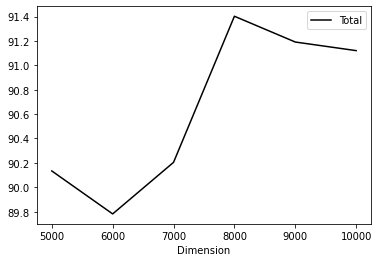

<Figure size 2.88e+06x7200 with 0 Axes>

In [ ]:
ax = plt.gca()

# line plot for math marks
# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_English',
#         color = 'green',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_French',
#         color = 'yellow',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Russian',
#         color = 'red',ax = ax)

df_res.plot(kind = 'line',
        x = 'Dimension',
        y = 'Total',
        color = 'black',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Dutch',
#         color = 'brown',ax = ax)


# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Italian',
#         color = 'violet',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Sweedish',
#         color = 'blue',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Turkish',
#         color = 'purple',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Danish',
#         color = 'indigo',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Spanish',
#         color = 'cyan',ax = ax)

# show the plot
f = plt.figure()
f.set_figwidth(40000)
f.set_figheight(100)
plt.show()

In [ ]:
  #{"English", "French", "Spanish", "Portugeese", "Italian", "Russian", "Sweedish", "Dutch", "Turkish", "German", "Danish"}
  #Counter(
      {'English': 1385,
       'French': 1014,
       'Spanish': 819,
       'Portugeese': 739,
       'Italian': 698,
       'Russian': 692,
       'Sweedish': 676,
       'Dutch': 546,
       'Turkish': 474,
       'German': 470,
       'Danish': 428}